# BASIC WORKFLOW:-

1. Collecting dataset
2. Image processing
3. Train_Test Split
4. Neural Network Model training
5. Feed a new test image and predict

# Importing the Dependencies

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import cv2 
from PIL import Image 
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Ddata from keras.datasets

In [4]:
# for the mnist data , it is already preprocessed and divided into train and tes
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
type(X_train)
#image already converted to numpy array

numpy.ndarray

In [6]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


1. Training data=60,000 images
2. Testing data=10,000 images
3. Image dimension=28x28
4. Grayscale Image-> 1channel

In [7]:
print(X_train[10])#printing 11th image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

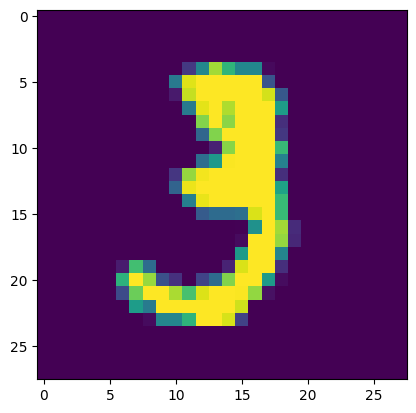

3


In [8]:
#DISPLAYING THE IMAGE
plt.imshow(X_train[10])
plt.show()
#print the corresponding label
print(Y_train[10])

In [9]:
#IMAGE LABELS

#print the unique values
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply one hot encoding

All images have the same dimension in this dataset.
If not we have to resize all images to a common dimension

# SCALING THE VALUES

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# BUILDING THE NEURAL NETWORK (not CNN)

CNN mainly used for image recognition while RNN for text and audio recognition.
But here we are building a simple neural network

In [13]:
#setting up layers of the neural network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),#flattening converts into a single dimensional array 
    keras.layers.Dense(50,activation='relu'),#adding 2 layers with 50 neurons in each
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')#the last layer should have no of neurons equal to number of columns i.e; features
])

In [14]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#can read the documentation for different optimizers and loss functions present


In [15]:
#training th eneural network
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10


1875/1875 [==============================] - 4s 2ms/step - loss: 0.2896 - accuracy: 0.9164
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1294 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0939 - accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0766 - accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0625 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539 - accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0470 - accuracy: 0.9849
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9861
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0

Accuracy on training data = 99.01%

For test data:

In [16]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.1075 - accuracy: 0.9725
0.9725000262260437


accuracy of test data is 97.5%, so it doesnot overfit

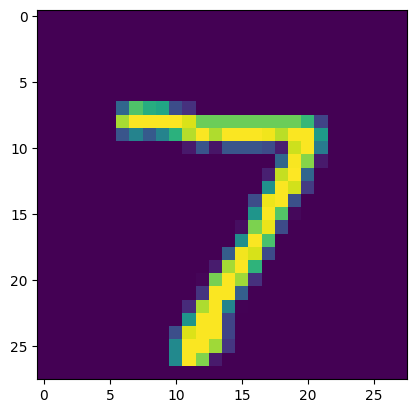

In [17]:
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])
#it gives the probabilities of each label like for image to be 0 prob is 2.9e-4

[1.2739442e-03 4.5958809e-03 5.8934357e-02 8.1649172e-01 7.4728877e-07
 2.4049243e-02 2.0391052e-07 9.9998999e-01 1.3641001e-01 7.0679367e-02]


mode.predict() gives the prediction probability of each class for that data 

In [22]:
#converting prediction prob to class label
label_for_1_image=np.argmax(Y_pred[0])
print(label_for_1_image)

7


In [23]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 9, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 7, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 7, 4, 2, 0, 7, 1, 1, 2, 1, 

TRUE LABELS=Y_test and the PREDICTED LABELS=Y_pred_labels

# CONFUSION MATRIX

In [24]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 949    0    5    0    1    8    9    4    3    1]
 [   0 1127    2    1    0    2    1    0    2    0]
 [   0    1 1003    9    3    0    1    7    8    0]
 [   0    0    2  973    0   17    0    6    5    7]
 [   1    1    2    1  968    1    3    1    0    4]
 [   2    0    0    7    4  869    3    1    1    5]
 [   2    2    1    0    7   11  928    0    7    0]
 [   0    5    8    3    1    0    0 1006    0    5]
 [   2    0    1    3    9    8    1    3  942    5]
 [   0    3    0    4   24    4    0   11    3  960]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

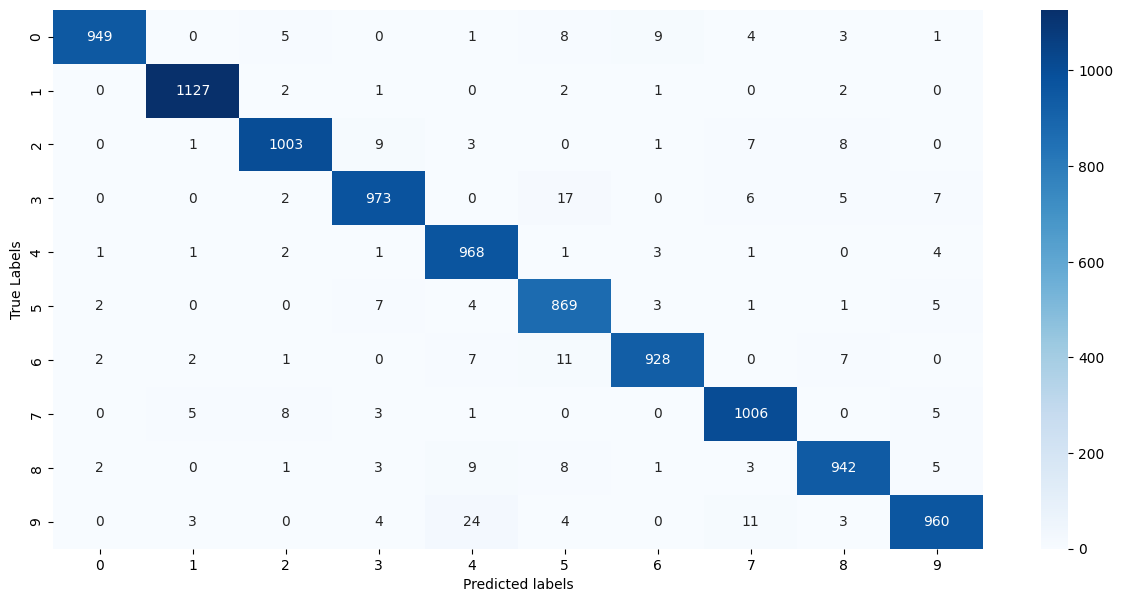

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted labels')

# TO BUILD A PREDICTIVE SYSTEM

In [26]:
input_image_path='D:\deeplearning\MNIST_1.png'
input_image=cv2.imread(input_image_path)

In [27]:
type(input_image)

numpy.ndarray

In [28]:
cv2.imshow('Input Image', input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
input_image.shape
#rgb as 3 

(532, 540, 3)

In [30]:
#convert to grayscale and then resize
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [31]:
grayscale.shape

(532, 540)

In [32]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [33]:
input_image_resize.shape

(28, 28)

In [34]:
cv2.imshow('Input Image resized', input_image_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
#every changes we did for our training data has to be done again
input_image_resize=input_image_resize/255

In [36]:
type(input_image_resize)

numpy.ndarray

In [37]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])
#predicting for only 1 image

In [38]:
type(image_reshaped)

numpy.ndarray

In [39]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 31ms/step
[[1.22862654e-02 6.18756175e-01 1.99847538e-02 1.00866535e-04
  1.95103496e-01 2.55519837e-01 1.53067902e-01 1.39898270e-01
  3.12530816e-01 1.57215679e-03]]


In [40]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

1
